# Crossing the river task

## Situation
The sailboat needs to sail upwind from start line to the finish line on port tack.

There is a river of adverse flood parallel to the wind. 
The sailboat starts at the left edge of the river, sails at true wind angle $\alpha_r$ with across the river.
Once the river is crossed sailboat sails in the slack water with the true  wind angle $\alpha_s$
Wind is constant across the course

## Question
Find TWA $\alpha_r$ to cross the river? 

<img src="fig1.jpg" />



Velocity up river:
$$ v_{ur} = v_r cos \alpha_r - v_c$$  
Velocity cross river: 
$$ v_{cr} = v_r sin \alpha_r $$  
Time to cross the river:
$$ t_r = \frac{w}{v_{cr}} = \frac{w}{v_r sin \alpha_r}  $$
Distance sailed upriver:
$$ d_{ur} = (v_r cos \alpha_r - v_c) t_r $$
Time sailed in the slack water:
$$ t_s = \frac{d - d_{ur}}{v_s cos \alpha_s } $$
Total time
$$ t = \frac{d}{v_s cos \alpha_s } - \frac{d_{ur}}{v_s cos \alpha_s } + \frac{w}{v_r sin \alpha_r} $$



In [1]:
# Import necessary packages and magic

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def calc_time_cross_river(river_width, v_r, twa_r):
    """ Calculate time to cross the river"""
    t_r = river_width / (v_r * np.sin(twa_r))
    return t_r

In [3]:
def calc_dist_up_river(t_r, v_r, twa_r, v_c):
    """ Calculate the distance sailed up the river"""
    d_ur = (v_r * np.cos(twa_r) - v_c) * t_r
    return d_ur


In [4]:
def calc_time_in_slack(d, d_ur, v_s, twa_s):
    """ Calculate time sailed in slack water"""
    t_s = (d - d_ur) / (v_s * np.cos(twa_s))
    return t_s


In [5]:
def kts2ms(kts):
    """ Converts knots to m/s"""
    return kts * 1852. / 3600.


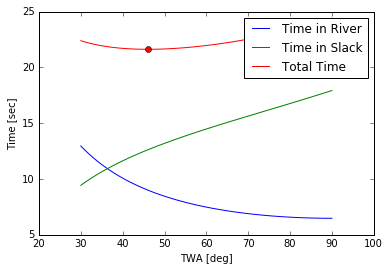

In [21]:
# Set some parameters 
v_c = kts2ms(3)

w_min = 20.
w_max = 21.
w_step = 20.

v_r = kts2ms(6)
v_s = kts2ms(6)

twa_s = np.deg2rad(20)
twa_river_min = np.deg2rad(30)
twa_river_max = np.deg2rad(90)
twa_river_step = np.deg2rad(1)

d = w_max * 2

for w in np.arange(w_min, w_max, w_step):
    twa_r = np.arange(twa_river_min, twa_river_max, twa_river_step)
    t_r = calc_time_cross_river(w, v_r, twa_r)
    d_ur = calc_dist_up_river(t_r, v_r, twa_r, v_c)
    t_s = calc_time_in_slack(d, d_ur, v_s, twa_s)
    t = t_r + t_s

    opt_idx = np.argmin(t)
    
    plt.plot(np.rad2deg(twa_r), t_r)
    plt.plot(np.rad2deg(twa_r), t_s)
    plt.plot(np.rad2deg(twa_r), t)
    plt.plot(np.rad2deg(twa_r[opt_idx]), t[opt_idx],'or')
    plt.legend(['Time in River', 'Time in Slack', 'Total Time'])
    plt.xlabel('TWA [deg]')
    plt.ylabel('Time [sec]')



In [22]:
print 'Optimal TWA %f' % np.rad2deg(twa_r[opt_idx])

Optimal TWA 46.000000
